# Random Forest

## Import Library

In [125]:
import pandas as pd
import numpy as np
import re
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Import dataset

In [126]:
# data explaination

# age: age of primary beneficiary

# sex: insurance contractor gender, female, male

# bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
# objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

# children: Number of children covered by health insurance / Number of dependents

# smoker: Smoking

# region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

# charges: Individual medical costs billed by health insurance


In [127]:
path = 'C:/Users/julia/Desktop/Yanjun/Python/Data/insurance.csv'
insurance = pd.read_csv(path)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [128]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Clean and organize the data

In [129]:
# decision tree doesn't need to change data to numerical type and alos doesnt need to standardise the data
ohe = OneHotEncoder(drop = 'first', sparse_output = False, dtype = 'int')
# find the data which contain 'object'
object_insurance = insurance.select_dtypes('object')
insurance_ohe = ohe.fit_transform(X = object_insurance)


In [130]:
# find insurance which doesn't contain any object
yes_object = insurance.select_dtypes('object').columns
cond = insurance.columns.isin(yes_object)
none_onject = insurance[insurance.columns[~cond]]

In [131]:
# construct the new dataframe
insurance_ohe = pd.DataFrame(data = insurance_ohe, columns= ohe.get_feature_names_out())
insurance_ohe
# concat insurance_ohe and dataframe without object
insurance1 = pd.concat((insurance_ohe, none_onject),axis = 1)

## Split features and target

In [132]:
cond = insurance1.columns == 'charges'
features = insurance1.columns[~cond]
X = insurance1[features]
y = insurance1['charges']

## Split training and test

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.3, random_state= 1789)

## DEcision TRee 

In [134]:
decision = DecisionTreeRegressor()
decision.fit(X = X_train, y = y_train)


DecisionTreeRegressor()

In [135]:
# predict the results
y_pred = decision.predict(X = X_test)

<Axes: ylabel='charges'>

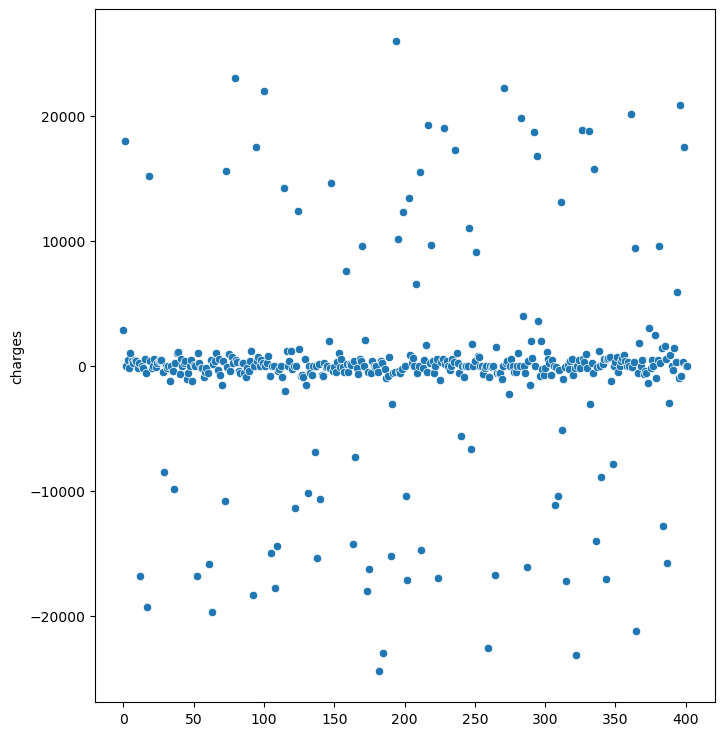

In [136]:
# check weather the residual is distributed evenly
y_residual = y_test - y_pred

fig, axes = plt.subplots(figsize = (8,9))
sns.scatterplot(x = range(0, y_test.size), y = y_residual)

In [137]:
decision.score(X = X_test, y = y_test)

0.660956689852443

## Normalize the data

In [138]:
# normalize the insurance1 data
insurance2 = insurance1.copy()
std = StandardScaler()
insurance2.iloc[:,:] = std.fit_transform(insurance2.iloc[:,:])
insurance2

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,-1.010519,1.970587,-0.566418,-0.611324,1.765481,-1.438764,-0.453320,-0.908614,0.298584
1,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-1.509965,0.509621,-0.078767,-0.953689
2,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-0.797954,0.383307,1.580926,-0.728675
3,0.989591,-0.507463,1.765481,-0.611324,-0.566418,-0.441948,-1.305531,-0.908614,0.719843
4,0.989591,-0.507463,1.765481,-0.611324,-0.566418,-0.513149,-0.292556,-0.908614,-0.776802
...,...,...,...,...,...,...,...,...,...
1333,0.989591,-0.507463,1.765481,-0.611324,-0.566418,0.768473,0.050297,1.580926,-0.220551
1334,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418,-1.509965,0.206139,-0.908614,-0.914002
1335,-1.010519,-0.507463,-0.566418,1.635795,-0.566418,-1.509965,1.014878,-0.908614,-0.961596
1336,-1.010519,-0.507463,-0.566418,-0.611324,1.765481,-1.296362,-0.797813,-0.908614,-0.930362


In [139]:
# split the data into X and y
cond = insurance2.columns == 'charges'
y = insurance2['charges']
features_name = insurance2.columns[~cond]
X = insurance2[features_name]

In [140]:
# splitt the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 1789)

In [141]:
# decision tree to calculate the result
decision1 = DecisionTreeRegressor()
decision1.fit(X = X_train, y = y_train)

DecisionTreeRegressor()

In [142]:
y_pred1 = decision1.predict(X = X_test)
#
# calculate the residual 
y_residual1 = y_pred1 - y_test
decision1.score(X = X_test, y = y_test) ### no big difference after normalize the data


0.6699785461858634

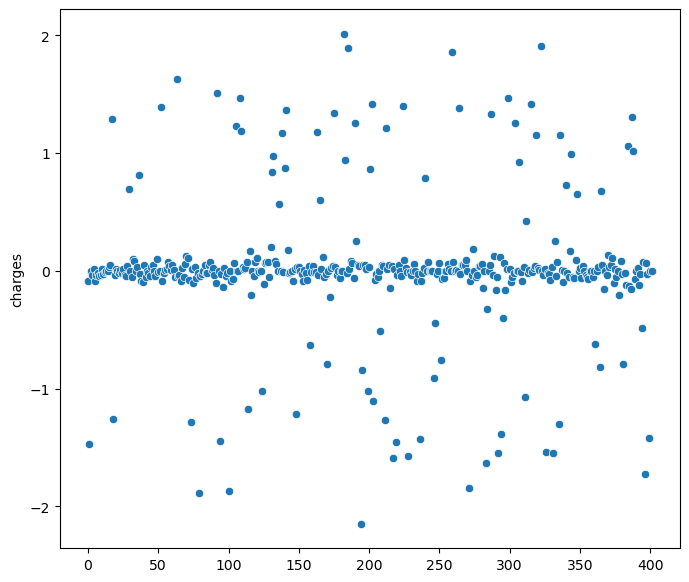

In [143]:
# check the residual distribution
fig, axes = plt.subplots(figsize = (8,7))
sns.scatterplot(x = range(0, y_test.size), y = y_residual1)
plt.show()